In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import load_house_data
from lab_utils_common import dlc

In [4]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

In [6]:
# scale / normalize
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw  X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")


Peak to Peak range by column in Raw  X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.8452591  6.13529646 2.05626214 3.68533012]


In [7]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"iterations: {sgdr.n_iter_}, n weight updates: {sgdr.t_}")


SGDRegressor()
iterations: 126, n weight updates: 12475.0


In [8]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [110.18958418 -21.03631125 -32.44285393 -38.03203224], b:[363.15701175]


In [9]:
y_pred_sgdr = sgdr.predict(X_norm)
print(f"Prediction on training set:\n{y_pred_sgdr[:4]}" )
print(f"Target values \n{y_train[:4]}")


Prediction on training set:
[295.1642015  485.98903605 389.67522596 492.15218774]
Target values 
[300.  509.8 394.  540. ]


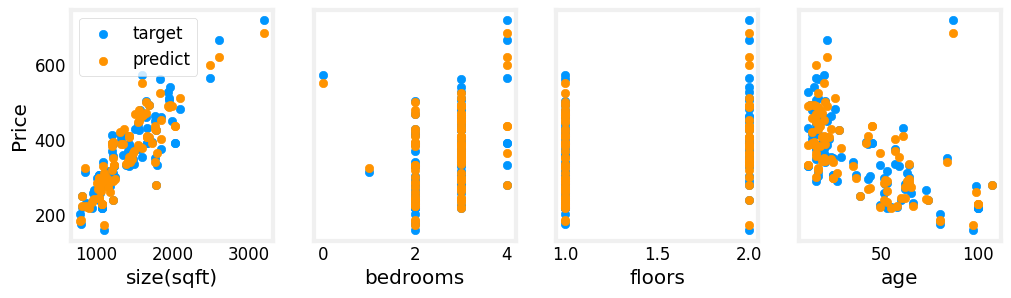

In [10]:
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train, label="target")
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred_sgdr,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
plt.show()
